In [1]:
pip install tensorflow pillow numpy


Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
from PIL import Image
import cv2
import matplotlib.pyplot as plt
import numpy as np

diseased_leaves = r"C:\Users\Mahes\OneDrive\Desktop\Sem 3\Pattern Recognition\A Database of Leaf Images Practice towards Plant Conservation with Plant Pathology\Diseased"
healthy_leaves = r"C:\Users\Mahes\OneDrive\Desktop\Sem 3\Pattern Recognition\A Database of Leaf Images Practice towards Plant Conservation with Plant Pathology\Healthy"



In [3]:

#Check and load images
def check_and_load_images(folder):
    images = []
    if not os.path.exists(folder):
        print(f"The folder {folder} does not exist.")
        return images
    
    file_list = os.listdir(folder)
    if not file_list:
        print(f"No images found in folder {folder}.")
        return images
    
    for filename in file_list:
        img_path = os.path.join(folder, filename)
        try:
            img = Image.open(img_path)
            images.append(img)
        except Exception as e:
            print(f"Failed to load image {filename}: {e}")
    
    if images:
        print(f"Successfully loaded {len(images)} images from {folder}.")
    else:
        print(f"No images could be loaded from {folder}.")
    
    return images

#Check and load images from both folders
images1 = check_and_load_images(diseased_leaves)
images2 = check_and_load_images(healthy_leaves)


Successfully loaded 2225 images from C:\Users\Mahes\OneDrive\Desktop\Sem 3\Pattern Recognition\A Database of Leaf Images Practice towards Plant Conservation with Plant Pathology\Diseased.
Successfully loaded 1959 images from C:\Users\Mahes\OneDrive\Desktop\Sem 3\Pattern Recognition\A Database of Leaf Images Practice towards Plant Conservation with Plant Pathology\Healthy.


In [4]:
import os
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split

#Parameters
IMG_SIZE = (128, 128)  # Resize images to 128x128 pixels

#Function to load and process images
def load_images(folder, label):
    images = []
    labels = []
    
    if not os.path.exists(folder):
        print(f"The folder {folder} does not exist.")
        return images, labels
    
    file_list = os.listdir(folder)
    if not file_list:
        print(f"No images found in folder {folder}.")
        return images, labels
    
    for filename in file_list:
        img_path = os.path.join(folder, filename)
        try:
            img = Image.open(img_path).resize(IMG_SIZE)
            img = np.array(img) / 255.0  # Normalize pixel values to [0, 1]
            images.append(img)
            labels.append(label)
        except Exception as e:
            print(f"Failed to load image {filename}: {e}")
    
    return images, labels



In [5]:
#Load images and labels
diseased_images, diseased_labels = load_images(diseased_leaves, label=1)
healthy_images, healthy_labels = load_images(healthy_leaves, label=0)

#Combine and shuffle the data
images = np.array(diseased_images + healthy_images)
labels = np.array(diseased_labels + healthy_labels)

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(images, labels, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

#Verify the shape of the datasets
print("Training set shape:", X_train.shape
print("Validation set shape:", X_val.shape)
print("Test set shape:", X_test.shape)



Training set shape: (2510, 128, 128, 3)
Validation set shape: (837, 128, 128, 3)
Test set shape: (837, 128, 128, 3)


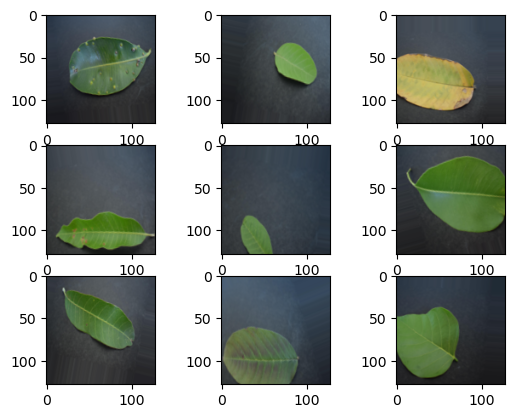

In [6]:

from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2
)

#Apply data augmentation to training data (for demonstration)
datagen.fit(X_train)

#Display some augmented images (for verification)
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
    for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.imshow(X_batch[i])
    plt.show()
    break


In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

#Define your model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

#Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#Using a data generator for data augmentation
datagen = ImageDataGenerator(rotation_range=20, width_shift_range=0.2, height_shift_range=0.2, horizontal_flip=True, zoom_range=0.2)
datagen.fit(X_train)

#Train the model
history = model.fit(datagen.flow(X_train, y_train, batch_size=32), validation_data=(X_val, y_val), epochs=25)

#Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy:.4f}')

#Save the model to a specific path
model_path = '/mnt/data/leaf_disease_model.h5'
model.save(model_path)
print(f'Model saved to {model_path}')


Epoch 1/25
79/79 [==============================] - 27s 319ms/step - loss: 0.6707 - accuracy: 0.5693 - val_loss: 0.6250 - val_accuracy: 0.5854
Epoch 2/25
79/79 [==============================] - 24s 306ms/step - loss: 0.6185 - accuracy: 0.6558 - val_loss: 0.6258 - val_accuracy: 0.6272
Epoch 3/25
79/79 [==============================] - 25s 314ms/step - loss: 0.5997 - accuracy: 0.6857 - val_loss: 0.5108 - val_accuracy: 0.7491
Epoch 4/25
79/79 [==============================] - 23s 287ms/step - loss: 0.5064 - accuracy: 0.7542 - val_loss: 0.6995 - val_accuracy: 0.6906
Epoch 5/25
79/79 [==============================] - 23s 285ms/step - loss: 0.4616 - accuracy: 0.7809 - val_loss: 0.3484 - val_accuracy: 0.8686
Epoch 6/25
79/79 [==============================] - 23s 287ms/step - loss: 0.4441 - accuracy: 0.7916 - val_loss: 0.3673 - val_accuracy: 0.8375
Epoch 7/25
79/79 [==============================] - 23s 287ms/step - loss: 0.3822 - accuracy: 0.8271 - val_loss: 0.2956 - val_accuracy: 0.8853

C:\Users\Mahes\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved to /mnt/data/leaf_disease_model.h5


In [21]:
from PIL import Image

# Function to preprocess and predict a new image
def predict_image(model, img_path):
    img = Image.open(img_path).resize((128, 128))  # Correctly use a tuple for the size
    img = np.array(img) / 255.0
    img = np.expand_dims(img, axis=0)  # Expand dimensions to match the model's input shape
    
    prediction = model.predict(img)
    if prediction[0] > 0.5:
        return "Diseased"
    else:
        return "Healthy"

# Example usage
new_image_path = r"C:\Users\Mahes\OneDrive\Desktop\Sem 3\Pattern Recognition\apple-healthy.jpg"
result = predict_image(model, new_image_path)
print(f'The leaf is: {result}')


1/1 [==============================] - 0s 77ms/step
The leaf is: Diseased


In [26]:
import unittest
import numpy as np
from PIL import Image
from tensorflow.keras.models import load_model

# Assuming predict_image function is defined as shown previously
def predict_image(model, img_path):
    img = Image.open(img_path).resize((128, 128))
    img = np.array(img) / 255.0
    img = np.expand_dims(img, axis=0)  # Expand dimensions to match the model's input shape
    
    prediction = model.predict(img)
    if prediction[0] > 0.5:
        return "Diseased"
    else:
        return "Healthy"

# Paths to the model and test images
MODEL_PATH = '/mnt/data/leaf_disease_model.h5'
DISEASED_IMAGE_PATH = r"C:\Users\Mahes\OneDrive\Desktop\Sem 3\Pattern Recognition\apple-diseased.jpg"
HEALTHY_IMAGE_PATH = r"C:\Users\Mahes\OneDrive\Desktop\Sem 3\Pattern Recognition\apple-healthy.jpg"



1/1 [==============================] - 0s 90ms/step
The leaf in the first image is: Diseased
1/1 [==============================] - 0s 24ms/step
The leaf in the second image is: Diseased
1/1 [==============================] - 0s 20ms/step
The leaf in the new image is: Diseased


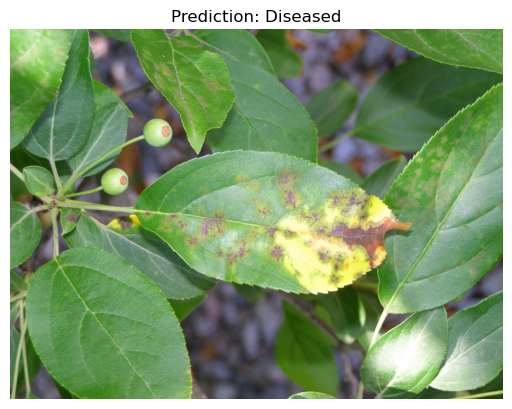

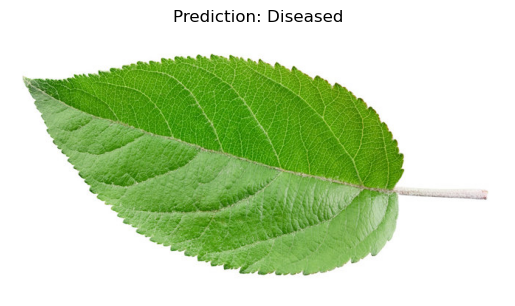

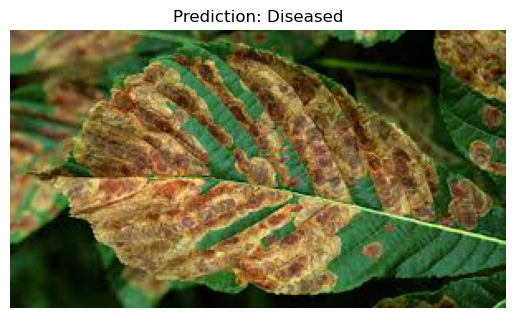

In [29]:
from tensorflow.keras.models import load_model
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Load the trained model
model = load_model('/mnt/data/leaf_disease_model.h5')

# Function to preprocess and predict a new image
def predict_image(model, img_path):
    img = Image.open(img_path).resize((128, 128))
    img = np.array(img) / 255.0
    img = np.expand_dims(img, axis=0)  # Expand dimensions to match the model's input shape
    
    prediction = model.predict(img)
    if prediction[0] > 0.5:
        return "Diseased"
    else:
        return "Healthy"

# Paths to the uploaded images
diseased_image_path = r"C:\Users\Mahes\OneDrive\Desktop\Sem 3\Pattern Recognition\apple-diseased.jpg"
healthy_image_path = r"C:\Users\Mahes\OneDrive\Desktop\Sem 3\Pattern Recognition\apple-healthy.jpg"
new_image_path = r"C:\Users\Mahes\OneDrive\Desktop\Sem 3\Pattern Recognition\images.jpeg"  # The new uploaded image

# Predict and display the results for the diseased leaf
result_diseased = predict_image(model, diseased_image_path)
print(f'The leaf in the first image is: {result_diseased}')

# Predict and display the results for the healthy leaf
result_healthy = predict_image(model, healthy_image_path)
print(f'The leaf in the second image is: {result_healthy}')

# Predict and display the results for the new image
result_new = predict_image(model, new_image_path)
print(f'The leaf in the new image is: {result_new}')

# Display the images with their predictions
def display_image_with_prediction(img_path, prediction):
    img = Image.open(img_path)
    plt.imshow(img)
    plt.title(f'Prediction: {prediction}')
    plt.axis('off')
    plt.show()

# Display diseased leaf image
display_image_with_prediction(diseased_image_path, result_diseased)

# Display healthy leaf image
display_image_with_prediction(healthy_image_path, result_healthy)

# Display new leaf image
display_image_with_prediction(new_image_path, result_new)


In [30]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

# Define your model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Using a data generator for data augmentation
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
datagen.fit(X_train)

# Train the model
history = model.fit(datagen.flow(X_train, y_train, batch_size=32), validation_data=(X_val, y_val), epochs=50)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy:.4f}')

# Save the model for later use
model_path = '/mnt/data/leaf_disease_model_improved.h5'
model.save(model_path)
print(f'Model saved to {model_path}')


Epoch 1/50
79/79 [==============================] - 26s 310ms/step - loss: 0.6774 - accuracy: 0.5367 - val_loss: 0.6621 - val_accuracy: 0.6022
Epoch 2/50
79/79 [==============================] - 24s 298ms/step - loss: 0.6407 - accuracy: 0.6171 - val_loss: 0.6189 - val_accuracy: 0.6858
Epoch 3/50
79/79 [==============================] - 24s 308ms/step - loss: 0.6120 - accuracy: 0.6765 - val_loss: 0.5466 - val_accuracy: 0.7372
Epoch 4/50
79/79 [==============================] - 24s 298ms/step - loss: 0.6064 - accuracy: 0.6637 - val_loss: 0.5429 - val_accuracy: 0.7168
Epoch 5/50
79/79 [==============================] - 24s 300ms/step - loss: 0.5491 - accuracy: 0.7203 - val_loss: 0.4980 - val_accuracy: 0.7360
Epoch 6/50
79/79 [==============================] - 23s 297ms/step - loss: 0.5153 - accuracy: 0.7450 - val_loss: 0.4448 - val_accuracy: 0.7766
Epoch 7/50
79/79 [==============================] - 23s 292ms/step - loss: 0.4874 - accuracy: 0.7709 - val_loss: 0.4801 - val_accuracy: 0.7527

C:\Users\Mahes\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 1s 1s/step
The leaf in the first image is: Healthy
1/1 [==============================] - 0s 21ms/step
The leaf in the second image is: Diseased
1/1 [==============================] - 0s 22ms/step
The leaf in the new image is: Diseased


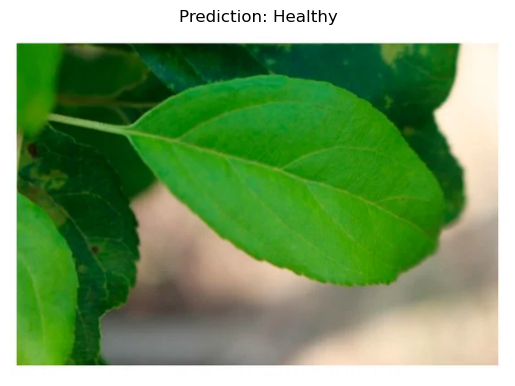

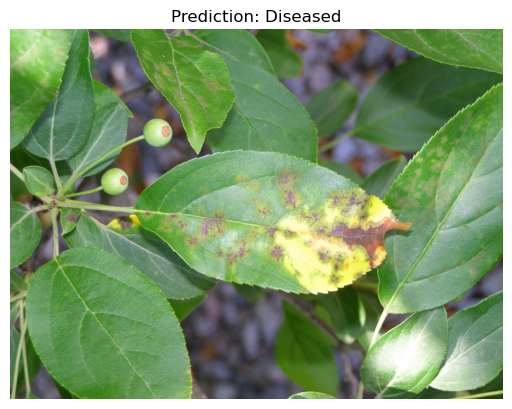

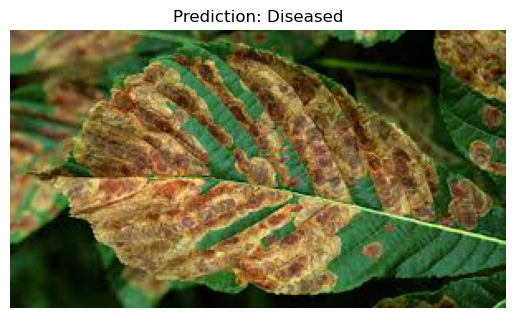

In [2]:
from tensorflow.keras.models import load_model
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Load the trained model
model = load_model('/mnt/data/leaf_disease_model.h5')

# Function to preprocess and predict a new image
def predict_image(model, img_path):
    img = Image.open(img_path).resize((128, 128))
    img = np.array(img) / 255.0
    img = np.expand_dims(img, axis=0)  # Expand dimensions to match the model's input shape
    
    prediction = model.predict(img)
    if prediction[0] > 0.5:
        return "Diseased"
    else:
        return "Healthy"

# Paths to the uploaded images
diseased_image_path = r"C:\Users\Mahes\OneDrive\Desktop\Sem 3\Pattern Recognition\healthy-page.webp"
healthy_image_path = r"C:\Users\Mahes\OneDrive\Desktop\Sem 3\Pattern Recognition\apple-diseased.jpg"
new_image_path = r"C:\Users\Mahes\OneDrive\Desktop\Sem 3\Pattern Recognition\images.jpeg"  # The new uploaded image

# Predict and display the results for the diseased leaf
result_diseased = predict_image(model, diseased_image_path)
print(f'The leaf in the first image is: {result_diseased}')

# Predict and display the results for the healthy leaf
result_healthy = predict_image(model, healthy_image_path)
print(f'The leaf in the second image is: {result_healthy}')

# Predict and display the results for the new image
result_new = predict_image(model, new_image_path)
print(f'The leaf in the new image is: {result_new}')

# Display the images with their predictions
def display_image_with_prediction(img_path, prediction):
    img = Image.open(img_path)
    plt.imshow(img)
    plt.title(f'Prediction: {prediction}')
    plt.axis('off')
    plt.show()

# Display diseased leaf image
display_image_with_prediction(diseased_image_path, result_diseased)

# Display healthy leaf image
display_image_with_prediction(healthy_image_path, result_healthy)

# Display new leaf image
display_image_with_prediction(new_image_path, result_new)


Model loaded from /mnt/data/leaf_disease_model.h5
1/1 [==============================] - 0s 242ms/step
The leaf in the image is: Diseased


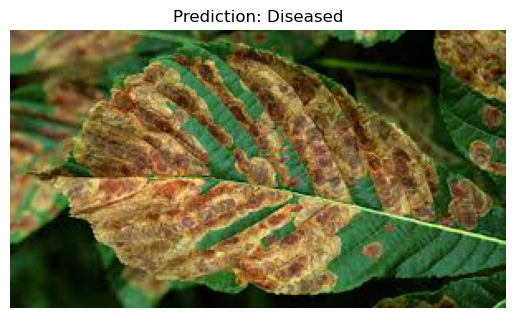

"\n# Example usage with the healthy leaf image\nhealthy_image_path = '/mnt/data/apple-healthy.jpg'\nresult_healthy = predict_image(model, healthy_image_path)\nprint(f'The leaf in the image is: {result_healthy}')\ndisplay_image_with_prediction(healthy_image_path, result_healthy)\n\n# Example usage with the new uploaded image\nnew_image_path = '/mnt/data/image.png'\nresult_new = predict_image(model, new_image_path)\nprint(f'The leaf in the new image is: {result_new}')\ndisplay_image_with_prediction(new_image_path, result_new)\n"

In [12]:
from tensorflow.keras.models import load_model
import numpy as np
from PIL import Image

# Load the trained model
model_path = '/mnt/data/leaf_disease_model.h5'
model = load_model(model_path)
print(f'Model loaded from {model_path}')


def predict_image(model, img_path):
    """
    Preprocess the image and predict its class using the trained model.
    
    Args:
    model: Trained Keras model.
    img_path: Path to the image file.
    
    Returns:
    str: 'Diseased' or 'Healthy' based on the model's prediction.
    """
    # Load and preprocess the image
    img = Image.open(img_path).resize((128, 128))
    img = np.array(img) / 255.0
    img = np.expand_dims(img, axis=0)  # Expand dimensions to match the model's input shape
    
    # Predict the class
    prediction = model.predict(img)
    return "Diseased" if prediction[0] > 0.5 else "Healthy"


import matplotlib.pyplot as plt

def display_image_with_prediction(img_path, prediction):
    """
    Display the image along with the prediction result.
    
    Args:
    img_path: Path to the image file.
    prediction: Prediction result ('Diseased' or 'Healthy').
    """
    img = Image.open(img_path)
    plt.imshow(img)
    plt.title(f'Prediction: {prediction}')
    plt.axis('off')
    plt.show()

# Example usage with the diseased leaf image
diseased_image_path = r"C:\Users\Mahes\OneDrive\Desktop\Sem 3\Pattern Recognition\images.jpeg"
result_diseased = predict_image(model, diseased_image_path)
print(f'The leaf in the image is: {result_diseased}')
display_image_with_prediction(diseased_image_path, result_diseased)

"""
# Example usage with the healthy leaf image
healthy_image_path = '/mnt/data/apple-healthy.jpg'
result_healthy = predict_image(model, healthy_image_path)
print(f'The leaf in the image is: {result_healthy}')
display_image_with_prediction(healthy_image_path, result_healthy)

# Example usage with the new uploaded image
new_image_path = '/mnt/data/image.png'
result_new = predict_image(model, new_image_path)
print(f'The leaf in the new image is: {result_new}')
display_image_with_prediction(new_image_path, result_new)
"""